In [ ]:

# Imports
import talib
import yfinance as yf
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend as K

In [ ]:
# Download historical market data
ticker = "SPY"
stock = yf.Ticker(ticker)

# get historical market data
hist = stock.history(period="3y")

In [ ]:
# Download historical data as dataframe
spy_data = yf.download('SPY', start='2020-01-01', end='2023-06-30')

In [ ]:
#Convert spy_data to csv file
spy_data.to_csv('SPY_data.csv')

In [ ]:
#read the above csv data, passing date as index.
spy_df =pd.read_csv('SPY_data.csv',index_col=0,parse_dates=True)
spy_df.head()

In [ ]:
spy_df.tail(10)

In [ ]:
spy_df.loc[:,['Close']]

In [ ]:
# Extract the 'Close' prices
data = spy_df.loc[:,['Close']].values.reshape(-1, 1)

In [ ]:
#Plotting the historical prices of spy
plt.figure(figsize=(15,8))
plt.title('Stock Prices History')
plt.plot(spy_df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [30]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [31]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [32]:
test_data

array([[0.56472764],
       [0.58164551],
       [0.57132205],
       [0.559193  ],
       [0.59404936],
       [0.61202701],
       [0.63577493],
       [0.62439157],
       [0.61638412],
       [0.65186841],
       [0.64083843],
       [0.63420472],
       [0.59632596],
       [0.5811745 ],
       [0.60213539],
       [0.61626636],
       [0.6243131 ],
       [0.5934213 ],
       [0.6741247 ],
       [0.68911924],
       [0.67581254],
       [0.68904065],
       [0.67710794],
       [0.67235829],
       [0.67938454],
       [0.67373215],
       [0.69457529],
       [0.70446703],
       [0.70411365],
       [0.67891353],
       [0.67624438],
       [0.72511383],
       [0.7239363 ],
       [0.72209142],
       [0.69335847],
       [0.67074891],
       [0.66811905],
       [0.68020881],
       [0.66859007],
       [0.69084636],
       [0.70270061],
       [0.69261266],
       [0.65426288],
       [0.62929815],
       [0.61654104],
       [0.61858225],
       [0.64091701],
       [0.619

In [33]:
# Create input-output sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [34]:
window_size = 30  # Number of previous days' closing prices to consider
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64,input_shape=(window_size, 1)))
model.add(Dense(1,activation='relu'))


In [36]:
#setting the optimizer and a loss function for the model.
model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train and fit the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
43/43 [==============================] - 5s 19ms/step - loss: 0.0474
Epoch 2/10
43/43 [==============================] - 1s 19ms/step - loss: 0.0028
Epoch 3/10
43/43 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 4/10
43/43 [==============================] - 1s 19ms/step - loss: 0.0017
Epoch 5/10
43/43 [==============================] - 1s 19ms/step - loss: 0.0017
Epoch 6/10
43/43 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 7/10
43/43 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 8/10
43/43 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 9/10
43/43 [==============================] - 1s 17ms/step - loss: 0.0016
Epoch 10/10
43/43 [==============================] - 1s 17ms/step - loss: 0.0015


In [39]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


5/5 [==============================] - 0s 12ms/step


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(X_test, y_test)

# Print the MSE
print("Mean Squared Error:", mse)

In [40]:


# Evaluate the model 
train_loss = model.evaluate(X_train, y_train, verbose=1)
test_loss = model.evaluate(X_test, y_test, verbose=1)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)


5/5 [==============================] - 0s 9ms/step - loss: 6.1849e-04
Train Loss: 0.0014047694858163595
Test Loss: 0.0006184910889714956


In [41]:
# Inverse scale the predictions(normalizing the data back)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

print(train_predictions[len(train_predictions)-10:])

[[371.2467 ]
 [369.5817 ]
 [369.63055]
 [370.1261 ]
 [370.455  ]
 [369.73843]
 [368.58023]
 [367.15393]
 [365.62622]
 [365.1976 ]]


In [42]:
print(test_predictions[len(test_predictions)-10:])

[[431.10513]
 [433.16052]
 [434.8119 ]
 [435.97412]
 [436.63367]
 [437.19788]
 [437.28177]
 [436.9822 ]
 [437.03116]
 [437.14465]]


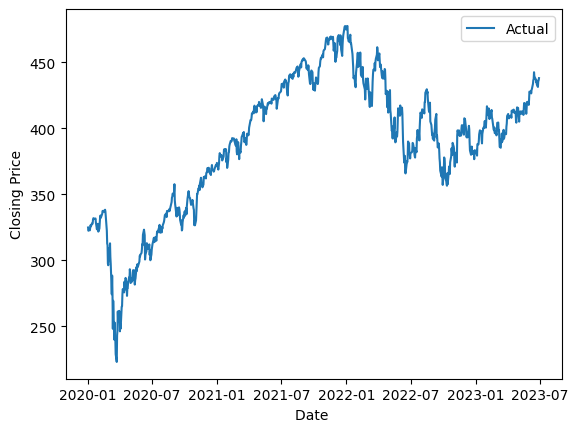

In [47]:
# Plot the predicted and actual closing prices
plt.plot(spy_df['Close'], label='Actual')
plt.xlabel('Date ')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

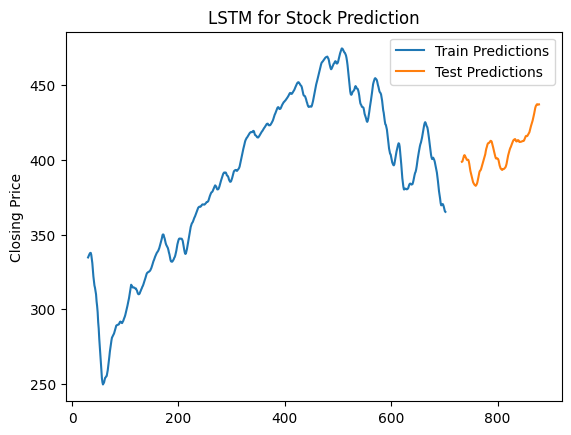

In [58]:
# Plot the predicted and actual closing prices
plt.plot(range(window_size, train_size), train_predictions, label='Train Predictions')
plt.plot(range(train_size + window_size, len(data)), test_predictions, label='Test Predictions')
plt.ylabel('Closing Price')
plt.title('LSTM for Stock Prediction')
plt.legend()
plt.show()